<a href="https://colab.research.google.com/github/paulopestanaj/infnet-bootcamp/blob/master/Normaliza%C3%A7%C3%A3o_Padroniza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Padronização

Padronização é quando as features sofrem uma mudança de escala, e passam a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

$$
z = \frac{x - \mu}{\sigma}
$$

Vamos verificar com o dataset de Vinhos da UCI.

https://archive.ics.uci.edu/ml/datasets/wine

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None).iloc[:, 0:3]
df.columns = ['target', 'Alcohol', 'MalicAcid']
df.head()

,target,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Para padronizar, usaremos o Standard Scaler. 

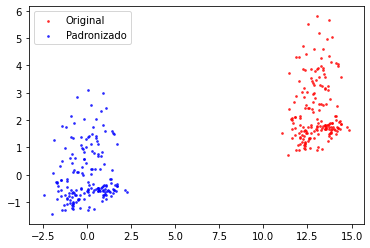

In [ ]:
# padronização
std = StandardScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

Podemos ver na mão a conta que foi feita aplicando a formula.

In [ ]:
print('Alcohol standard for the first register is '+ str((df['Alcohol'][0] - df['Alcohol'].mean()) / df['Alcohol'].std()))
print('MalicAcid standard for the first register is '+ str((df['MalicAcid'][0] - df['MalicAcid'].mean()) / df['MalicAcid'].std()))

Alcohol standard for the first register is 1.5143407672921458
MalicAcid standard for the first register is -0.560668220516758


In [ ]:
std[0]

array([ 1.51861254, -0.5622498 ])

A Padronização tende a colocar os valores a partir da média 0 e a 1 desvio padrão. 


## Normalização

Basicamente, a normalização coloca os dados dentro de uma escala $[0, 1]$. Apesar de não ser a única forma de normalização, utiliza-se mais frequentemente o `Min-Max scaling`, que é calculado da seguinte maneira:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

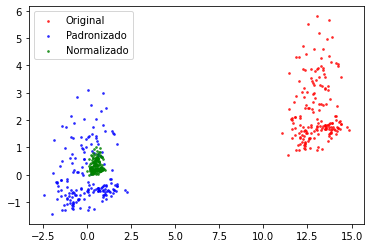

In [ ]:
# Normalização
minmax = MinMaxScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
ax.scatter(minmax[:,0], minmax[:,1], c='green', s=3, label='Normalizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

Vamos colocar na formula para comparar.

In [ ]:
print('Alcohol normal for the first register is '+str((df['Alcohol'][0] - df['Alcohol'].min()) / (df['Alcohol'].max() - df['Alcohol'].min())))
print('MalicAcid normal for the first register is '+str((df['MalicAcid'][0] - df['MalicAcid'].min()) / (df['MalicAcid'].max() - df['MalicAcid'].min())))

Alcohol normal for the first register is 0.8421052631578949
MalicAcid normal for the first register is 0.191699604743083


In [ ]:
minmax[0]

array([0.84210526, 0.1916996 ])

**Quando padronizar ou normalizar?**

Não há uma resposta óbiva e única para isso. Depende muito do algoritmo, aplicação e dados que você está usando.

Veja alguns exemplos:
* A padronização é essencial na análise de clusters, uma vez que se compara a similaridade das features por meio das distâncias.
* A padronização é mais desejável no PCA, por causa da maximização da variância.
* As imagens RGB, com escala original entre 0 e 255, devem levar essa intensidade de pixels para valores entre 0 e 1, ou seja, preferiremos normalizar os valores.
* Redes neurais normalmente irão esperar valores normalizados entre 0 e 1.
* Normalização é muito mais sensível à presença de outliers.

# Referências:

- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf
- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
- https://sebastianraschka.com/Articles/2014_about_feature_scaling.html